### Test case: Two vessels sharing an unloading resource

Runs a simulation with two vessels (different capacities and different speeds) used for transporting goods from A to B. There is a resource limit on site B so that it can handle only 1 vessel at a time.

#### Import libraries

In [1]:
import networkx as nx
from openclsim.plot import get_gantt_chart
from openclsim.plot.graph_dependencies import DependencyGraph
from openclsim.plot.critical_path_log import CpLog

from scenario_resource_dependency import getActivitiesAndObjects

#### Run the simulation

In [2]:
act, obj = getActivitiesAndObjects()

#### Plot the Gantt chart

In [3]:
fig = get_gantt_chart(obj)

#### Check the dependencies

With the dependency graph dependecies for generic/base activities (Move, Basic, ShiftAmount) are extracted from the model setup. This excludes (time dependent) dependencies, such as start conditions based on container level and resource limitations.

In [4]:
dep_G = DependencyGraph(act)

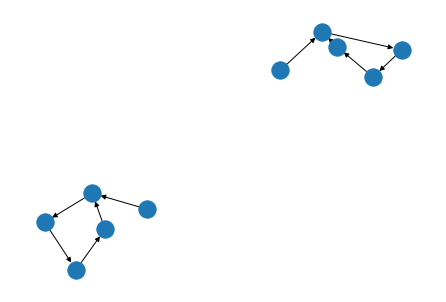

In [5]:
nx.draw(dep_G.G)

In [6]:
dep_G.getListDependencies()

[('e137597c-df4c-4e0b-b1dc-ef26050352b0',
  '7c59fd1a-a2e1-48f4-8d1f-b0d92304b3b3'),
 ('e90969c5-c9d1-4032-b408-ff300a300a7d',
  '45c4849e-5c14-448c-8497-ffc411c3413d'),
 ('7c59fd1a-a2e1-48f4-8d1f-b0d92304b3b3',
  'efe17c23-9046-45f3-a68c-03bca913a212'),
 ('efe17c23-9046-45f3-a68c-03bca913a212',
  '0009e9cf-e956-4f6e-bc38-175c6759fe4b'),
 ('0009e9cf-e956-4f6e-bc38-175c6759fe4b',
  'a2a9aa06-c49e-4b50-a893-226899fbe67c'),
 ('a2a9aa06-c49e-4b50-a893-226899fbe67c',
  '7c59fd1a-a2e1-48f4-8d1f-b0d92304b3b3'),
 ('45c4849e-5c14-448c-8497-ffc411c3413d',
  '1adc57d3-1cf0-47f2-a5bf-d475c5e8a55c'),
 ('1adc57d3-1cf0-47f2-a5bf-d475c5e8a55c',
  'dfe7260d-0620-42d5-85a3-fd2aa04efc27'),
 ('dfe7260d-0620-42d5-85a3-fd2aa04efc27',
  '92855c1d-bcdc-486b-82cb-a66bdac9b92c'),
 ('92855c1d-bcdc-486b-82cb-a66bdac9b92c',
  '45c4849e-5c14-448c-8497-ffc411c3413d')]

In [7]:
dep_G.getListBaseActivities()

['e137597c-df4c-4e0b-b1dc-ef26050352b0',
 'e90969c5-c9d1-4032-b408-ff300a300a7d',
 '7c59fd1a-a2e1-48f4-8d1f-b0d92304b3b3',
 'efe17c23-9046-45f3-a68c-03bca913a212',
 '0009e9cf-e956-4f6e-bc38-175c6759fe4b',
 'a2a9aa06-c49e-4b50-a893-226899fbe67c',
 '45c4849e-5c14-448c-8497-ffc411c3413d',
 '1adc57d3-1cf0-47f2-a5bf-d475c5e8a55c',
 'dfe7260d-0620-42d5-85a3-fd2aa04efc27',
 '92855c1d-bcdc-486b-82cb-a66bdac9b92c']

### Get critical path log and dependencies

In [8]:
my_cp_log_l = CpLog(obj, act)
my_cp_log_l.get_dependencies()
my_cp_log_l.mark_critical_activities()
#my_cp_log_l.make_gantt_mpl()
my_cp_log_l.make_gantt_plotly()

-- total elapsed time 0.1479816436767578 seconds


### Full critical log and dependencies output
If one is interested, the logging and the dependencies as used for critical path determination can be shown.

In [9]:
print(my_cp_log_l.all_cp_dependencies)
my_cp_log_l.cp_log.head()

[('cp_activity_42', 'cp_activity_59'), ('cp_activity_18', 'cp_activity_2'), ('cp_activity_2', 'cp_activity_36'), ('cp_activity_9', 'cp_activity_43'), ('cp_activity_44', 'cp_activity_61'), ('cp_activity_7', 'cp_activity_41'), ('cp_activity_88', 'cp_activity_72'), ('cp_activity_134', 'cp_activity_100'), ('cp_activity_5', 'cp_activity_39'), ('cp_activity_39', 'cp_activity_56'), ('cp_activity_87', 'cp_activity_71'), ('cp_activity_124', 'cp_activity_90'), ('cp_activity_66', 'cp_activity_32'), ('cp_activity_136', 'cp_activity_102'), ('cp_activity_25', 'cp_activity_9'), ('cp_activity_127', 'cp_activity_93'), ('cp_activity_130', 'cp_activity_96'), ('cp_activity_4', 'cp_activity_38'), ('cp_activity_69', 'cp_activity_103'), ('cp_activity_19', 'cp_activity_3'), ('cp_activity_89', 'cp_activity_73'), ('cp_activity_51', 'cp_activity_68'), ('cp_activity_67', 'cp_activity_136'), ('cp_activity_21', 'cp_activity_5'), ('cp_activity_36', 'cp_activity_53'), ('cp_activity_125', 'cp_activity_91'), ('cp_activ

,Activity,ActivityID,SimulationObject,start_time,state,duration,end_time,cp_activity_id,is_critical
0,vessel_b: loading,45c4849e-5c14-448c-8497-ffc411c3413d,from_site,1970-01-01 00:00:00,ACTIVE,0 days 00:01:40,1970-01-01 00:01:40.000000,cp_activity_69,True
1,vessel_a: loading,7c59fd1a-a2e1-48f4-8d1f-b0d92304b3b3,from_site,1970-01-01 00:00:00,ACTIVE,0 days 00:03:20,1970-01-01 00:03:20.000000,cp_activity_1,False
2,vessel_a: loading,7c59fd1a-a2e1-48f4-8d1f-b0d92304b3b3,vessel_a,1970-01-01 00:00:00,ACTIVE,0 days 00:03:20,1970-01-01 00:03:20.000000,cp_activity_1,False
3,vessel_b: loading,45c4849e-5c14-448c-8497-ffc411c3413d,vessel_b,1970-01-01 00:00:00,ACTIVE,0 days 00:01:40,1970-01-01 00:01:40.000000,cp_activity_69,True
4,vessel_b: sailing full,1adc57d3-1cf0-47f2-a5bf-d475c5e8a55c,vessel_b,1970-01-01 00:01:40,ACTIVE,0 days 00:15:42.824591,1970-01-01 00:17:22.824591,cp_activity_103,True
